## What is this notebook about

In this notebook we shall investigate the structure of the network of the Jemmah-Islamiyah cell that executed the Bali attack in October 2002. Conclusions will be drawn from several network metrics to uncover the inner structure of the terrorist cell. The density, the average degree and the average shortest path length will be compared to the corresponding values of the 9-11 Hijackers network, to assess whether the Jemmah-Islamiyah network focused on secrecy or on efficiency. Then, we will use four important centrality measures to find the most important actors in the network.

In [1]:
# Libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy. special
import csv
import numpy as np
from operator import itemgetter
from networkx.algorithms import community
from matplotlib.pyplot import figure
from random import random
from matplotlib.lines import Line2D

In [2]:
# Function 
def efficiency(dictionary, nodes_no):
    
    '''This function calculates the average efficiency of a graph. Its inputs are a dictionary that 
    contains the shortest paths for each node and the number of nodes of the network. We create a 
    summation variable that will be used in a nested loop and an empty list that will save the 
    local efficiencies for each node. The function returns the average efficiency for the graph.'''
    
    sum_per_n = 0
    local_eff = []
    
    for key1 in dictionary:
        for key2 in dictionary[key1]:
            x = dictionary[key1][key2]
            if x != 0:
                sum_per_n += (1 / x)
        local_eff.append(sum_per_n)
        
    return sum(local_eff) / ((nodes_no)*(nodes_no - 1))    

In [14]:
# Edgelist dataframe
dataset = pd.read_excel("JemaahE.xlsx")
df = pd.DataFrame(dataset)

# Creating the graph
G = nx.from_pandas_edgelist(df, "from", "to", edge_attr = ["weight"])

# Weight list
weights = list(df["weight"])

# Adding a new column with new weights as the reciprocal of the inicial ones
df["Weights"] = 1 / df["weight"]

# Printing some information
G.name = "Jemaah-Islamiyah terrorist cell"
n = len(G.nodes)
print(nx.info(G))

Name: Jemaah-Islamiyah terrorist cell
Type: Graph
Number of nodes: 17
Number of edges: 62
Average degree:   7.2941


In [4]:
# Assigning color to each node according to role attribute
colors = {
    "red": ["1", "Suicide Bombers"],
    "cyan": ["2", "Team Lima"],
    "green": ["3", "Operation Assistants"],
    "yellow": ["4", "Bomb Makers"],
    "gray": ["5", "Command Team"]
}

# List of node colors
node_color = ["gray", "green", "green", "gray", "yellow",  "gray", "yellow",
             "yellow", "yellow", "yellow", "green", "red", "red",
             "cyan", "cyan", "cyan", "cyan"]

# Elements for color legend
legend_elements = []
for key in colors:
    x = Line2D([0], [0], marker = 'o', color = 'w', label = colors[key][1],
           markerfacecolor = key, markersize = 15)
    legend_elements.append(x)

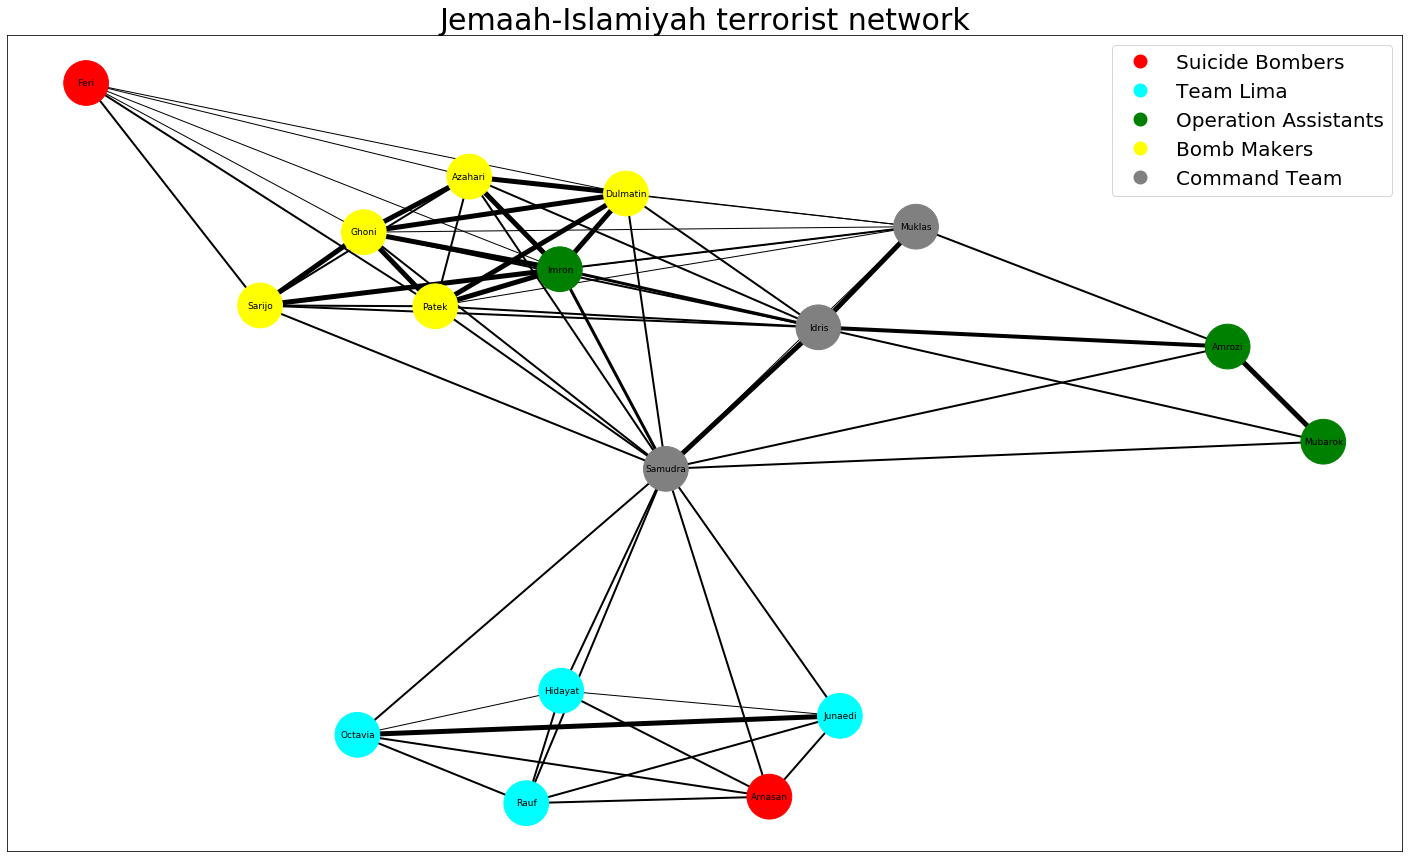

In [5]:
# Plot of the Graph
plt.rcParams['figure.figsize'] = [25, 15]
pos = nx.spring_layout(G, seed = 30) # Visualization according to the Fruchterman-Reingold force-directed algorithm
nx.draw_networkx(G, pos, node_size = 2000, font_size = 9, node_color = node_color, width = weights )
plt.legend(handles=legend_elements, prop={'size': 20})
plt.title("Jemaah-Islamiyah terrorist network", fontsize = 30)
plt.show()

### 1. Scores

We calculate some important scores that uncover the basic structure of the terrorist cell.

In [6]:
metrics = {
    "Metric": ["Order(n)", "Size(n)", "<d>", "Density", "Mean Geodesic", "Diameter"],
    "Values": [len(G.nodes), len(G.edges), 7.29, nx.density(G),
               nx.average_shortest_path_length(G, weight = "Weights"), nx.diameter(G)]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

,Metric,Values
0,Order(n),17.000000
1,Size(n),62.000000
2,<d>,7.290000
3,Density,0.455882
4,Mean Geodesic,1.595588
5,Diameter,3.000000


In [7]:
# Network efficiency
paths1 = dict(nx.shortest_path_length(G, weight = "Weights"))
eff1 = efficiency(paths1, n)

### 2. Centralities

Important actors are found by measuring the centralities for each node of the network. We limit ourselves to the investigation of the normalized values of the Degree centrality, Closeness, Betweenness centrality and the Neighbor density. Note that this network is a weighted one, therefore the centrality formulas for binary relations are modified (distant measures are approximated by the reciprocals of the weights of the edges). 

In [8]:
# A list with the calculated centralities, where each element is a dictionary
centralities = [nx.degree_centrality(G), nx.betweenness_centrality(G, weight = "Weights"),
               nx.closeness_centrality(G, distance = "Weights")]

In [9]:
# Neighbor Densities
neigh_dens = []
for node in G.nodes:
    sub_nodes = list(G.neighbors(node))
    if len(list(G.neighbors(node))) == 1:
        neigh_dens.append(0)
    elif len(list(G.neighbors(node))) == 2:
        sub_G = G.subgraph(sub_nodes)
        edg1 = sub_G.number_of_edges() / 2
        neigh_dens.append(edg1 / scipy.special.comb(len(list(G.neighbors(node))), 2))
    else:    
        sub_G = G.subgraph(sub_nodes)
        edg1 = sub_G.number_of_edges()
        neigh_dens.append(edg1 / scipy.special.comb(len(list(G.neighbors(node))), 2))

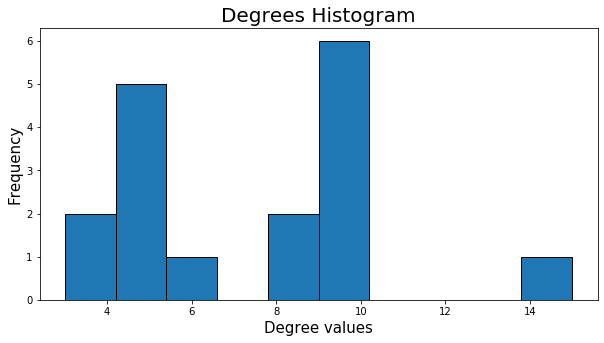

In [10]:
degrees = dict(G.degree(G.nodes))
sort_deg = sorted(degrees.items(), key = itemgetter(1), reverse = False)

# List of degrees only
degs = []
for _ in range(len(sort_deg)):
    degs.append(sort_deg[_][1])
    
# Plotting the degree distribution
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims,)
plt.title('Degrees Histogram', fontdict = {'size': 20}, loc = 'center')
plt.xlabel("Degree values", fontdict = {'size': 15})
plt.ylabel("Frequency", fontdict = {'size': 15})
plt.hist(degs, edgecolor = "black")
plt.show()

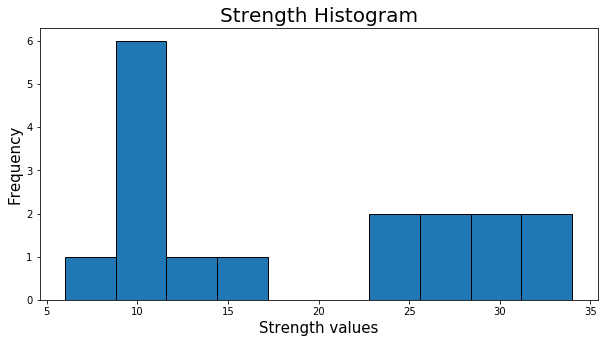

In [11]:
strengths = dict(nx.degree(G, weight = "weight"))
sort_stren = sorted(strengths.items(), key = itemgetter(1), reverse = False)

# List of degrees only
stren = []
for _ in range(len(sort_stren)):
    stren.append(sort_stren[_][1])
    
# Plotting the degree distribution
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims,)
plt.title('Strength Histogram', fontdict = {'size': 20}, loc = 'center')
plt.xlabel("Strength values", fontdict = {'size': 15})
plt.ylabel("Frequency", fontdict = {'size': 15})
plt.hist(stren, edgecolor = "black")
plt.show()

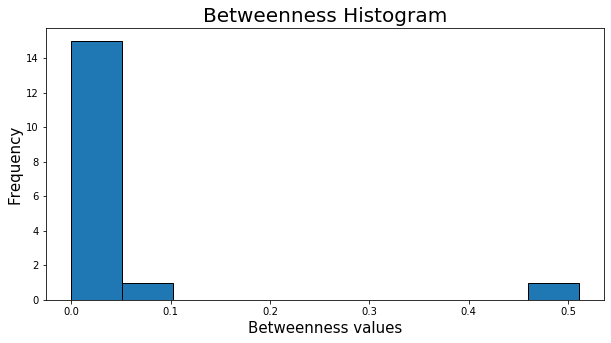

In [12]:
# Betweenness centrality distribution
bet_list = []
for key in centralities[1]:
    bet_list.append(centralities[1][key])

# Plot
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims,)
plt.title('Betweenness Histogram', fontdict = {'size': 20}, loc = 'center')
plt.xlabel("Betweenness values", fontdict = {'size': 15})
plt.ylabel("Frequency", fontdict = {'size': 15})
plt.hist(bet_list, edgecolor = "black")
plt.show()

### 3. Attack in the Bali network 

We will try to remove some of the main actors in the network to investigate its efficiency.

In [13]:
# Node removal from the cluster
G.remove_node("Ghoni")
paths1 = dict(nx.shortest_path_length(G, weight = "Weights"))
eff2 = efficiency(paths1, len(G.nodes))

In [15]:
# Removing Samudra (Need to restore the initial network first)
G.remove_node("Samudra")
# Keeping the main component of the graph
subnod_1 = list(G.nodes)[0:11]
# Creating subgraph
G_1 = G.subgraph(subnod_1)
# Efficiency
paths2 = dict(nx.shortest_path_length(G_1, weight = "Weights"))
eff3 = efficiency(paths2, len(G_1.nodes))

In [16]:
# Removing Idris and Samudra
G.remove_node("Idris")
# Keeping the main component of the graph
subnod_2 = list(G.nodes)[0:10]
# Subgraph
G_2 = G.subgraph(subnod_2)
# Efficiency
paths3 = dict(nx.shortest_path_length(G_2, weight = "Weights"))
eff4 = efficiency(paths3, len(G_2.nodes))

In [17]:
# Removing Muklas and Samudra and Idris
G.remove_node("Muklas")
# Keeping the main component of the graph
subnod_3 = list(G.nodes)[0:9]
# Subgraph 
G_3 = G.subgraph(subnod_3)
# Efficiency
paths4 = dict(nx.shortest_path_length(G_3, weight = "Weights"))
eff5 = efficiency(paths4, len(G_3.nodes))

In [18]:
efficiencies = {
    "Scenario": [1, 2, 3, 4],
    "Efficiencies": [eff2, eff3, eff4, eff5],
    "Reduction": [1-(eff2 / eff1), 1-(eff3 / eff1), 1-(eff4 / eff1), 1-(eff5 / eff1)]
}
eff_df = pd.DataFrame(efficiencies)
eff_df

,Scenario,Efficiencies,Reduction
0,1,6.276389,0.070502
1,2,5.069697,0.249206
2,3,4.400926,0.348248
3,4,2.916667,0.568058


### 4. Conclusions and thoughts drawn from the analysis

The comparison between the Jemmah terrorist cell and the al-Qaeda Hijackers cell, shows that the latter one preferred to sacrifice the optimal efficiency to ensure the greatest secrecy possible. On the other hand, the Jemmah-Islamiyah terrorist cell was built to act more efficiently which rendered it more exposed. All these can be understood by comparing the density, average degree and average shortest path length values. It should be noted that the hijackers of 9-11 attacks, in order to enhance their efficiency within the network, they used temporary links that reduced the average geodesic when activated. These hidden links ensured better information flow in order for the entire network to coordinate their acts(Krebs, 2002). This was achieved with the organisation of meetings(eg. The one in Las Vegas). 

The hijackers acted in the USA, whereas the Jemmah terrosist cell acted in Indonesia. In the case of hijackers secrecy was preffered, whereas in the second case efficiency was preferred. We can therefore, ask ourselves whether it is a common practice of terrorrists cells to focus on secrecy when operations are planned against countries with high surveillance and strong Intelligence agencies, such as the USA.